In [3]:
import time

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt
import umap.umap_ as umap
from sklearn.datasets import make_blobs
import numpy as np
%matplotlib inline
import scipy
import time
import networkx as nx
import collections
import EoN
from collections import defaultdict
import random
import pandas as pd
from seirsplus.models import *
from seirsplus.networks import *
import networkx

/opt/intel/inteloneapi/intelpython/latest/lib/python3.7/site-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sdc' failed to load due to 'VersionConflict((numba 0.51.2-dppy0.10.0-3.gbfbd2eeae.dirty (/glob/development-tools/versions/oneapi/beta10/inteloneapi/intelpython/python3.7/lib/python3.7/site-packages), Requirement.parse('numba<0.52,>=0.51.2')))'.
  numba.core.entrypoints.init_all()


In [4]:
from PIL import Image
import cv2
import io
import PIL
def get_img_from_fig(fig, dpi=100):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return img

In [7]:
def ipfn(s,c_arr, sd, n_neighbors,loop ):
    #s= no of points
    #c_arr = Array of centers
    #sd = std. dev.
    #n = n_neighbors 
    print([s,c_arr, sd, n_neighbors])
    h=loop
    i=n_neighbors
    arr = [int(s/2), int(s/2)]
    data,y = make_blobs(n_samples=arr,n_features=2,random_state=16, centers=c_arr ,cluster_std=sd)
    plt.scatter(data[:,0],data[:,1], c=y, cmap = 'viridis')
    plt.savefig(f'Graph_op/nn={i}|{h}|{c_arr[1]}|{sd}.png')
    
    r = np.random.RandomState(10)
    coo_matrix1 = umap.fuzzy_simplicial_set(data,n_neighbors,r,'euclidean')
    coo_matrix1 = np.asarray(coo_matrix1)
    sparse_matrix = coo_matrix1[0]
    #print(sparse_matrix.getnnz()

    G1 = nx.from_scipy_sparse_matrix(sparse_matrix)
    
    SIGMA  = 1/5.2
    GAMMA  = 1/10
    MU_I   = 0.002

    R0     = 2.5
    BETA   = 1/(1/GAMMA) * R0
    BETA_Q = 0.5*BETA

    P      = 0.2
    Q      = 0.05
    
    model_base = SEIRSNetworkModel(G       = G1, 
                          beta    = BETA, 
                          sigma   = SIGMA, 
                          gamma   = GAMMA, 
                          initE = s*0.4, initI = s*0.1)
    
    model_base.run(T=300)
    img = get_img_from_fig(model_base.figure_basic(ylim=0.5,xlim=100)[0])
    im = Image.fromarray(img)
    im.save(f'Trial_output/nn={i}|{h}|{c_arr[1]}|{sd}.png')

[1000, [[1, 1], [1, 5]], 1, 30]
t = 0.01
t = 10.01
t = 20.07
t = 30.02
t = 40.03
t = 50.06


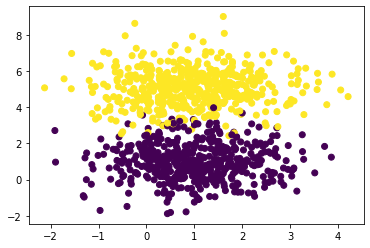

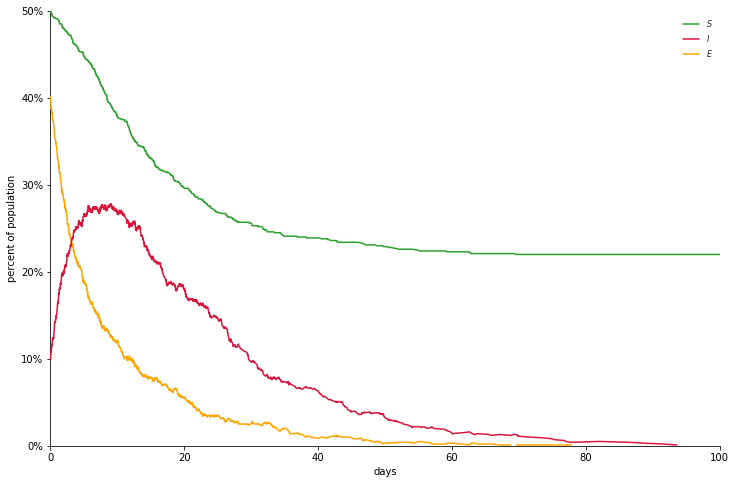

[1000, [[1, 1], [1, 5]], 2, 30]
t = 0.00
t = 10.02
t = 20.02
t = 30.02
t = 40.01
t = 50.26
t = 60.55
t = 70.63


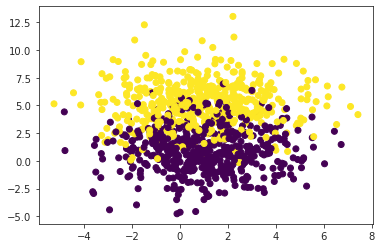

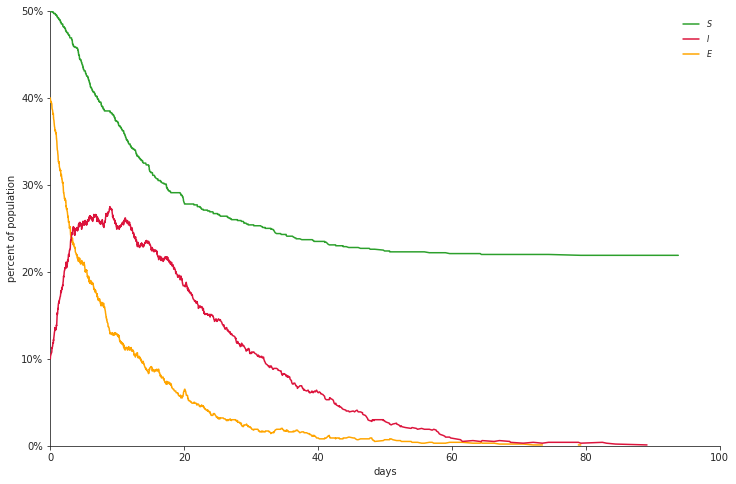

[1000, [[1, 1], [1, 5]], 3, 30]
t = 0.00
t = 10.00
t = 20.08
t = 30.02
t = 40.10
t = 50.10
t = 60.27
t = 80.42
t = 100.65


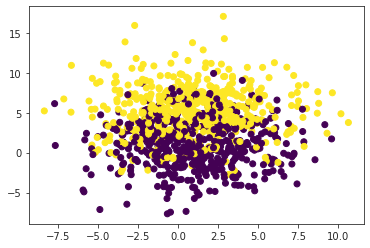

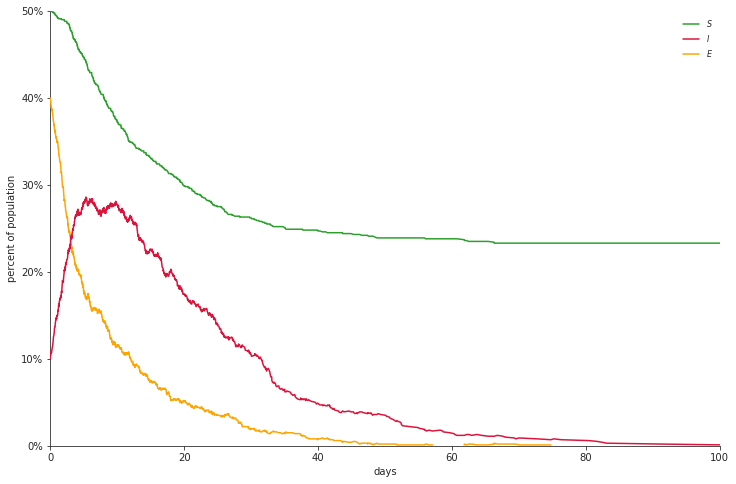

[1000, [[1, 1], [1, 5]], 4, 30]
t = 0.00
t = 10.03
t = 20.04
t = 30.07
t = 40.03
t = 50.08
t = 60.24
t = 70.25
t = 80.36


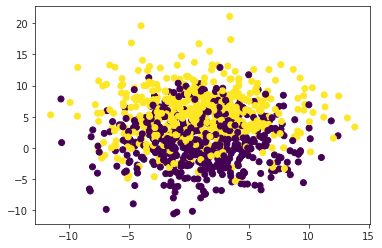

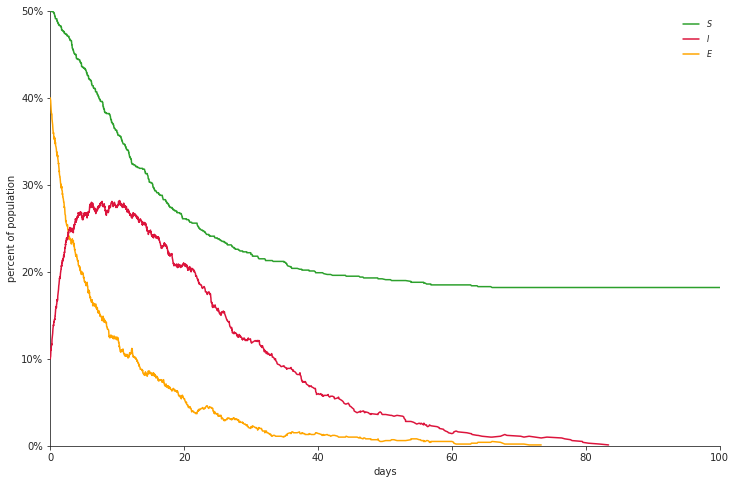

[1000, [[1, 1], [1, 5]], 5, 30]
t = 0.02
t = 10.02
t = 20.10
t = 30.05
t = 40.02
t = 50.08
t = 60.09
t = 80.79


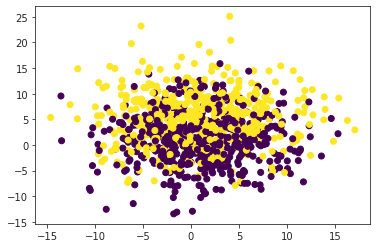

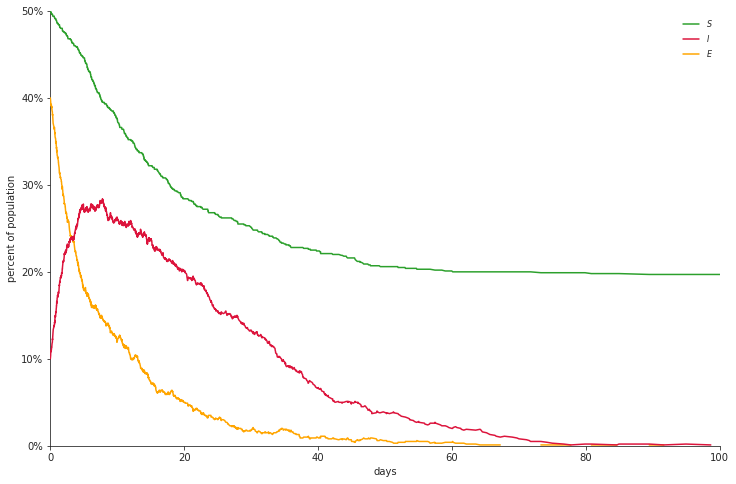

[1000, [[1, 1], [1, 5]], 6, 30]
t = 0.01
t = 10.01
t = 20.00
t = 30.06
t = 40.25
t = 50.11
t = 60.69
t = 80.15


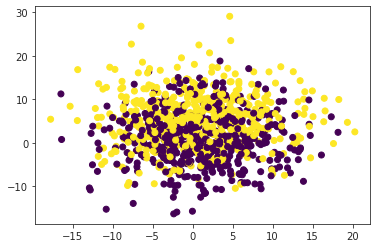

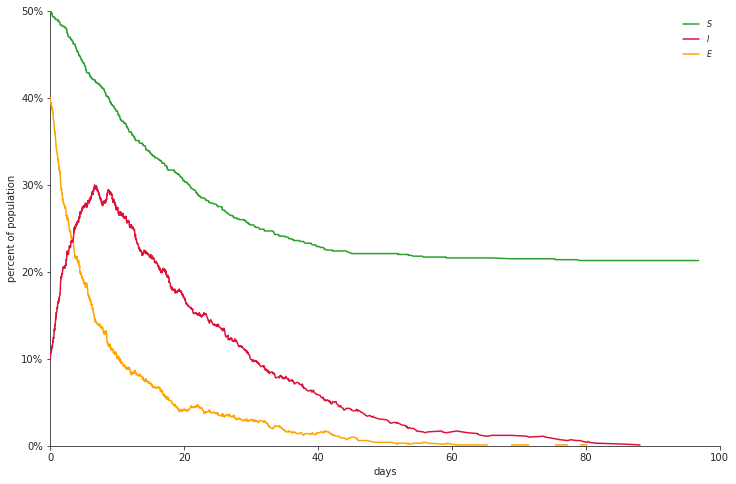

[1000, [[1, 1], [1, 9]], 1, 30]
t = 0.00
t = 10.01
t = 20.06
t = 30.03
t = 40.07
t = 50.06
t = 70.79


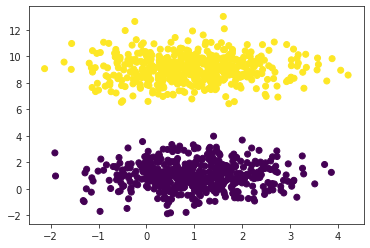

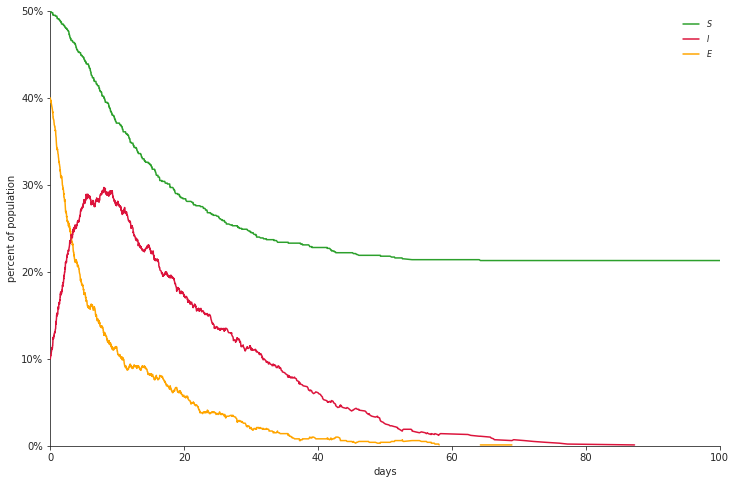

[1000, [[1, 1], [1, 9]], 2, 30]
t = 0.02
t = 10.01
t = 20.00
t = 30.15
t = 40.00
t = 50.01
t = 60.70
t = 70.50
t = 80.58


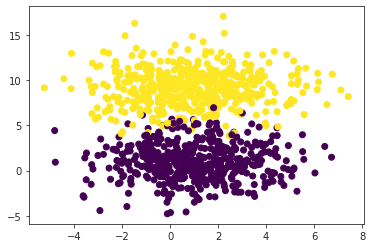

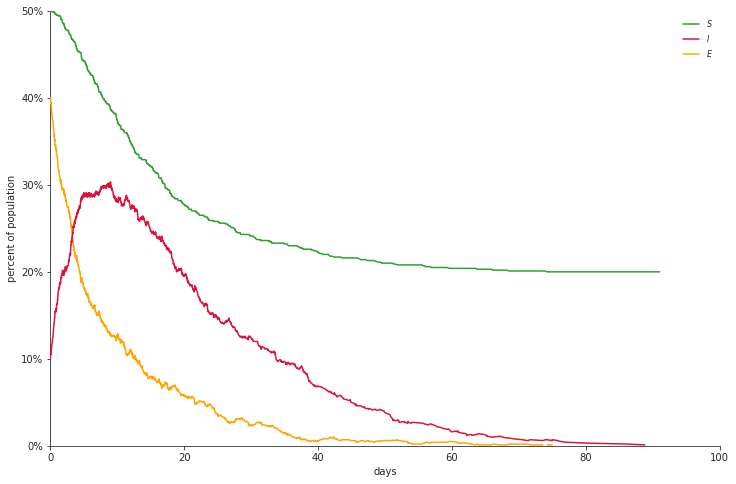

[1000, [[1, 1], [1, 9]], 3, 30]
t = 0.01
t = 10.01
t = 20.00
t = 30.02
t = 40.13
t = 50.41
t = 60.24


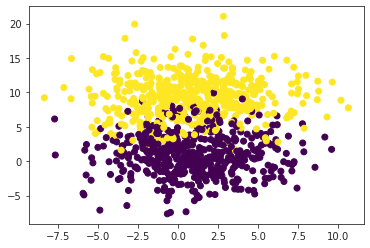

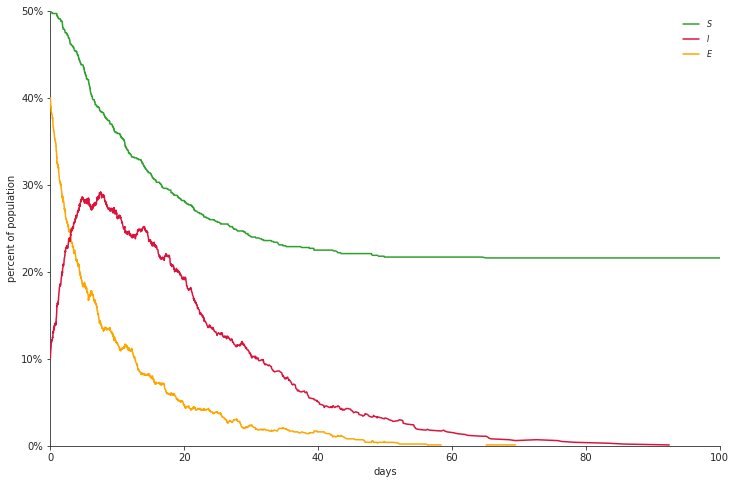

[1000, [[1, 1], [1, 9]], 4, 30]
t = 0.01
t = 10.01
t = 20.05
t = 30.10
t = 40.22
t = 50.06
t = 60.18
t = 70.10


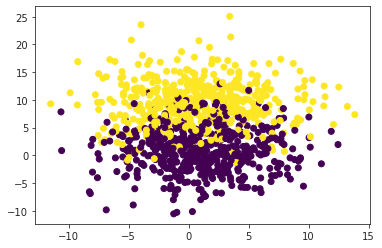

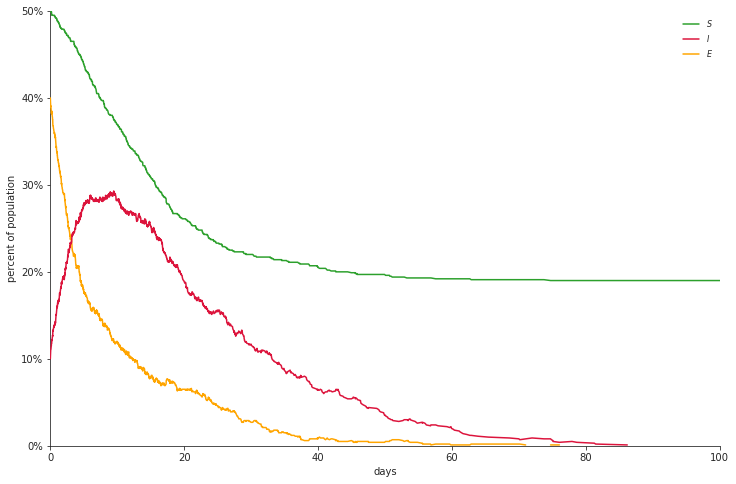

[1000, [[1, 1], [1, 9]], 5, 30]
t = 0.00
t = 10.00
t = 20.01
t = 30.02
t = 40.24
t = 50.04
t = 60.55
t = 70.57
t = 90.55


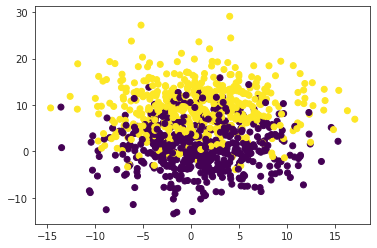

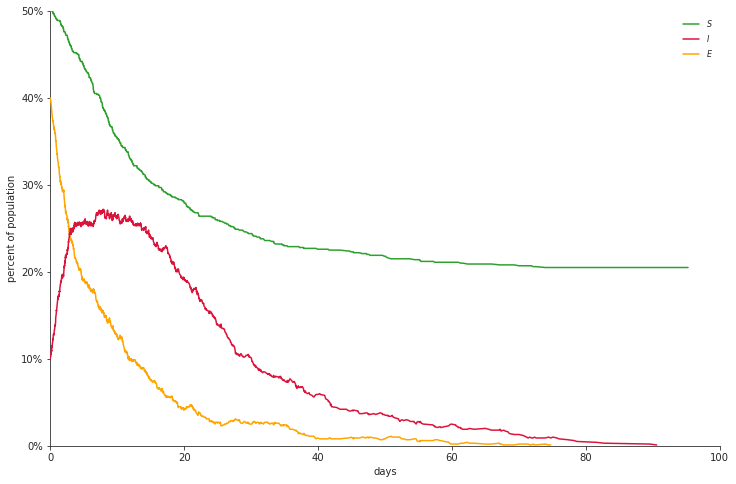

[1000, [[1, 1], [1, 9]], 6, 30]
t = 0.00
t = 10.00
t = 20.08
t = 30.05
t = 40.11
t = 50.04
t = 60.18


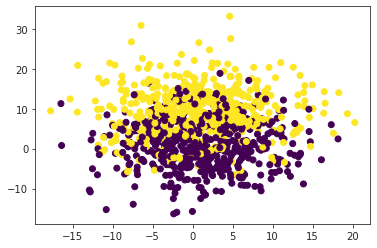

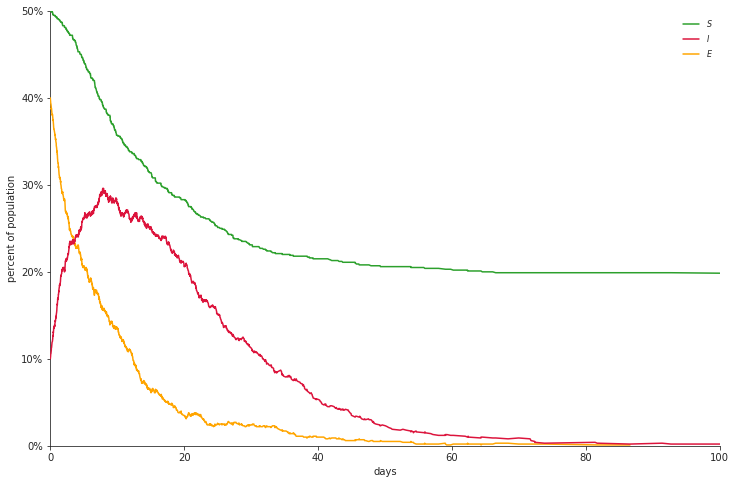

[1000, [[1, 1], [1, 13]], 1, 30]
t = 0.01
t = 10.01
t = 20.11
t = 30.02
t = 40.31
t = 50.21
t = 60.36
t = 70.26


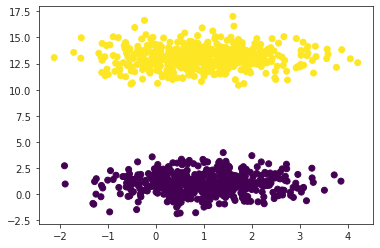

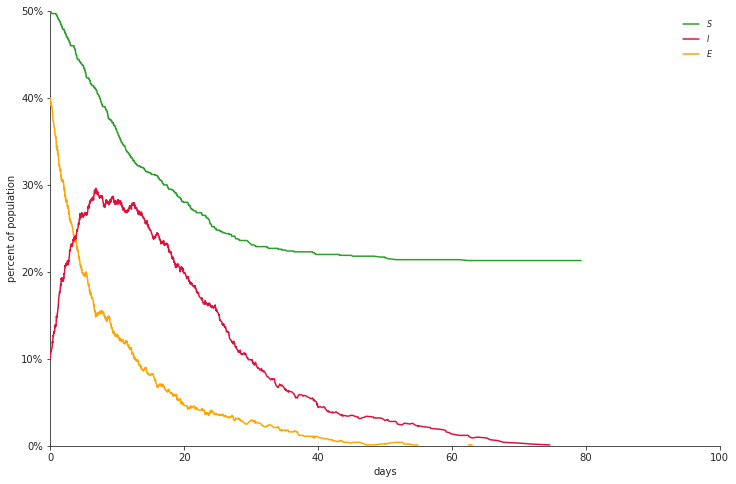

[1000, [[1, 1], [1, 13]], 2, 30]
t = 0.01
t = 10.02
t = 20.07
t = 30.06
t = 40.06
t = 50.04
t = 70.89
t = 80.89
t = 90.56


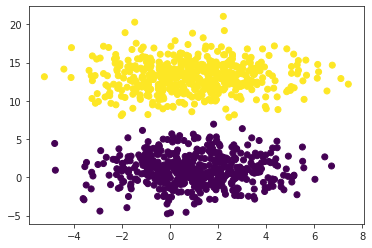

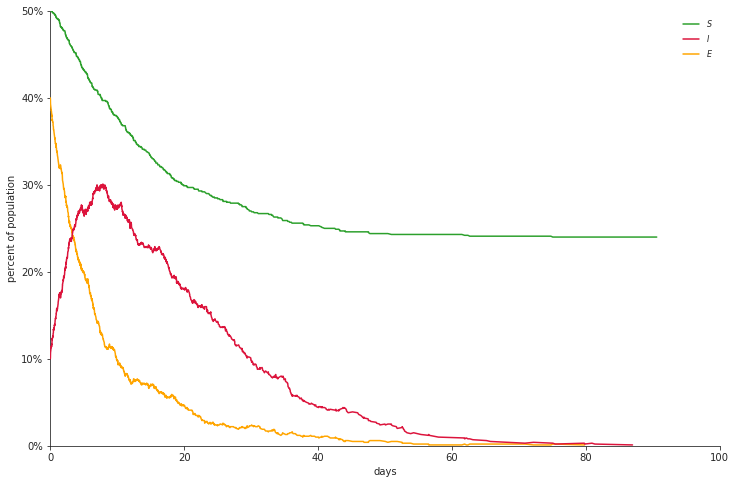

[1000, [[1, 1], [1, 13]], 3, 30]
t = 0.01
t = 10.01
t = 20.08
t = 30.15
t = 40.11
t = 50.06
t = 70.05


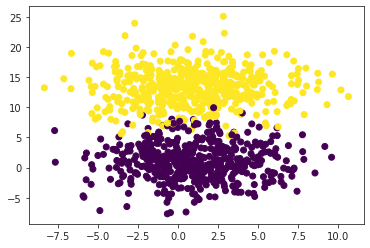

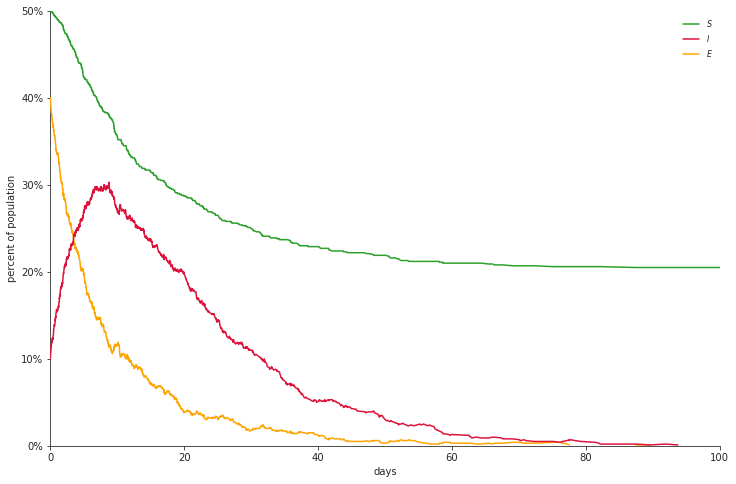

[1000, [[1, 1], [1, 13]], 4, 30]
t = 0.01
t = 10.02
t = 20.03
t = 30.06
t = 40.20
t = 50.48
t = 60.31
t = 70.41
t = 80.24
t = 90.06


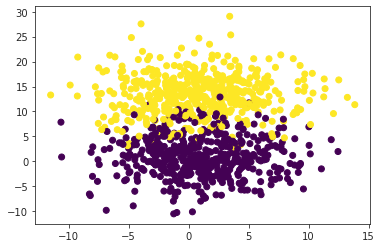

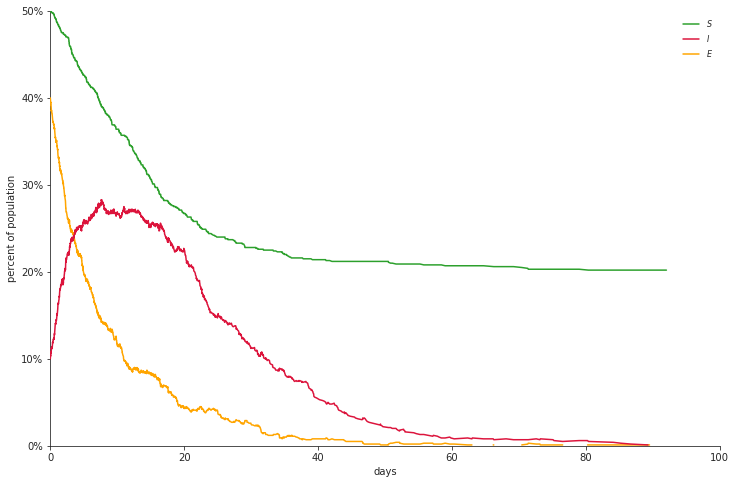

[1000, [[1, 1], [1, 13]], 5, 30]
t = 0.01
t = 10.06
t = 20.05
t = 30.01
t = 40.12
t = 50.02
t = 60.15
t = 70.05


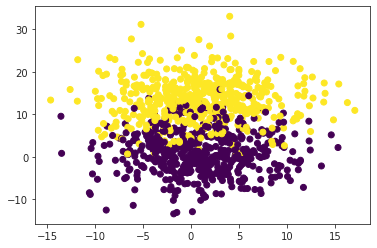

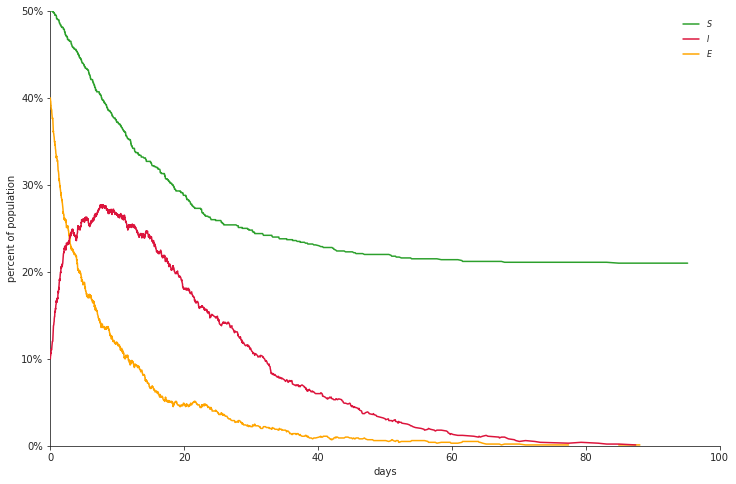

[1000, [[1, 1], [1, 13]], 6, 30]
t = 0.01
t = 10.00
t = 20.02
t = 30.01
t = 40.24
t = 50.08
t = 60.16
t = 70.75


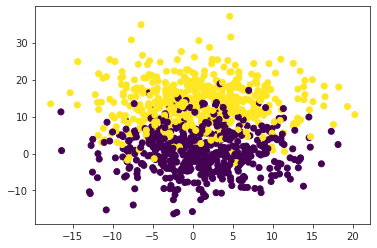

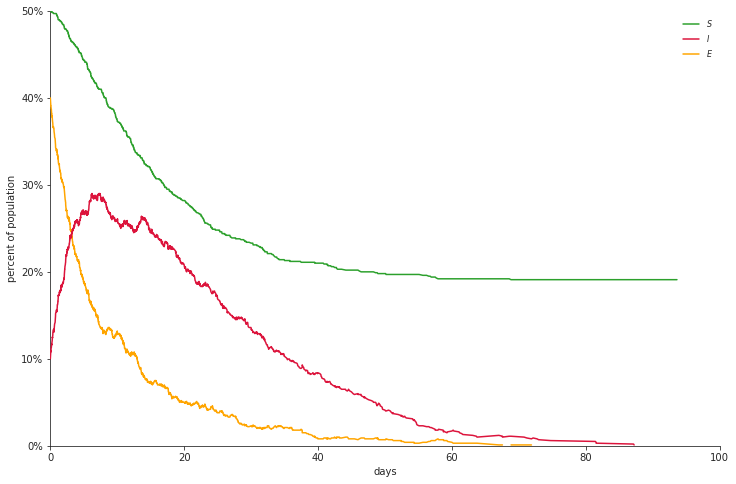

[1000, [[1, 1], [1, 17]], 1, 30]
t = 0.00
t = 10.02
t = 20.01
t = 30.05
t = 40.09
t = 50.20
t = 60.39
t = 70.43
t = 80.31


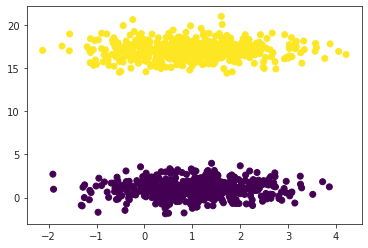

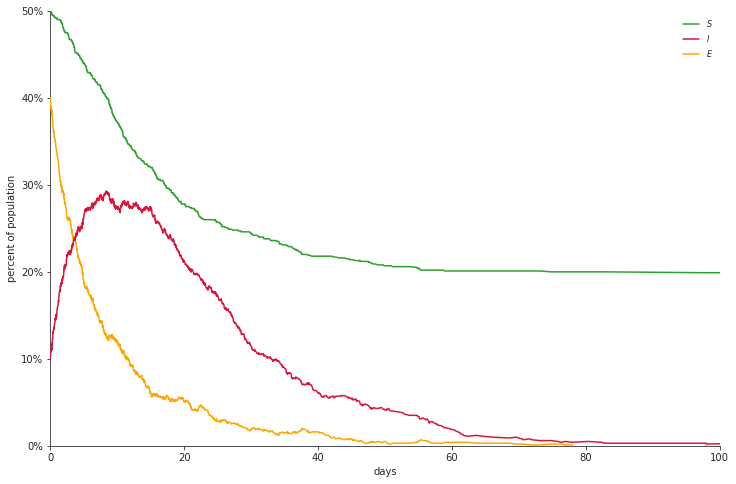

[1000, [[1, 1], [1, 17]], 2, 30]
t = 0.02
t = 10.00
t = 20.03
t = 30.07
t = 40.02
t = 50.65
t = 60.22
t = 70.27
t = 80.56


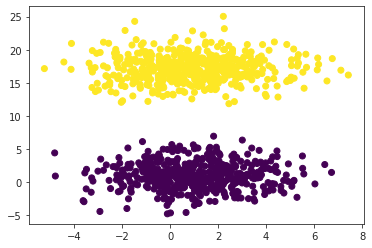

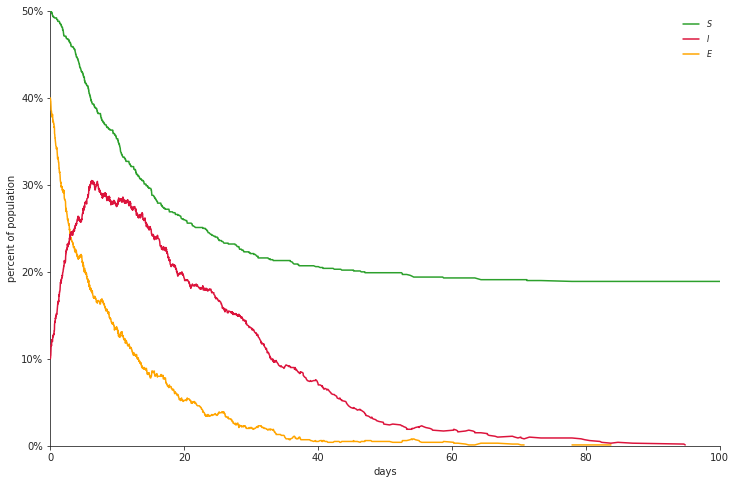

[1000, [[1, 1], [1, 17]], 3, 30]
t = 0.01
t = 10.01
t = 20.04
t = 30.01
t = 40.49
t = 50.06
t = 60.02


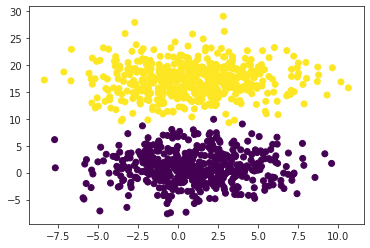

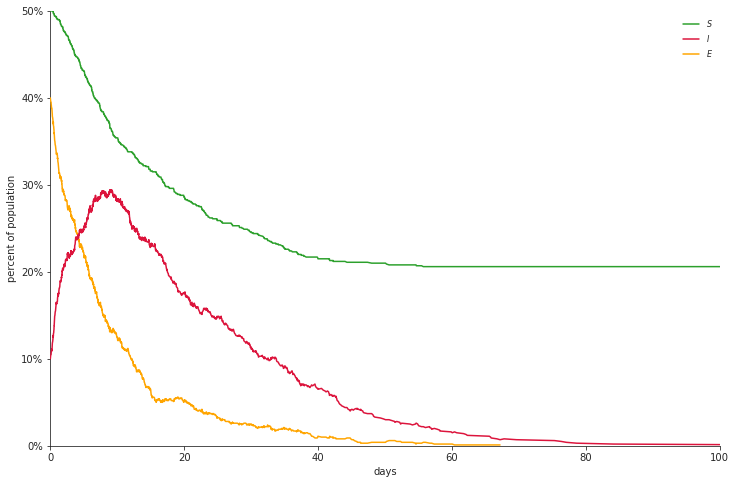

[1000, [[1, 1], [1, 17]], 4, 30]
t = 0.00
t = 10.00
t = 20.04
t = 30.00
t = 40.10
t = 50.32
t = 60.09
t = 70.74


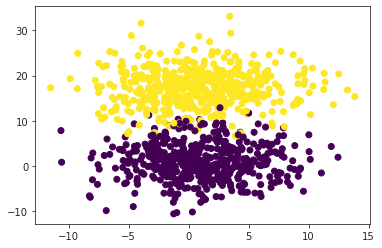

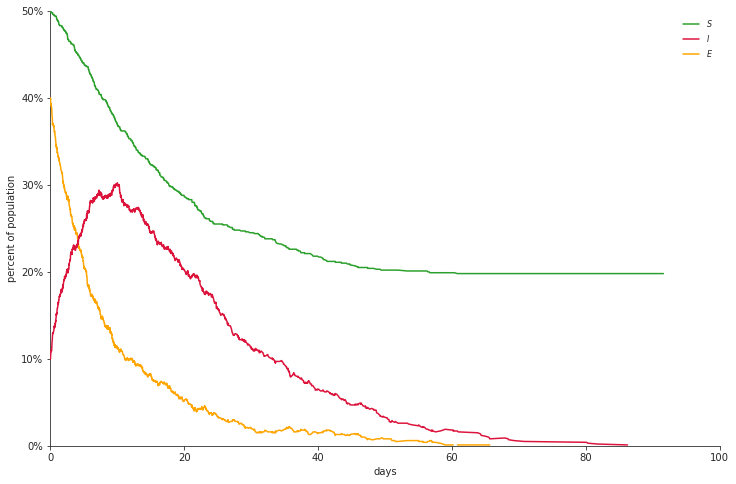

[1000, [[1, 1], [1, 17]], 5, 30]
t = 0.00
t = 10.00
t = 20.08
t = 30.11
t = 40.07
t = 50.21
t = 60.39
t = 70.70


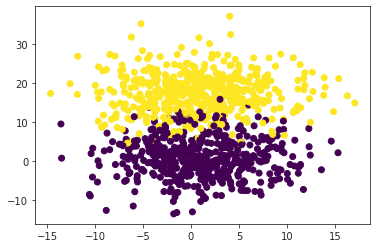

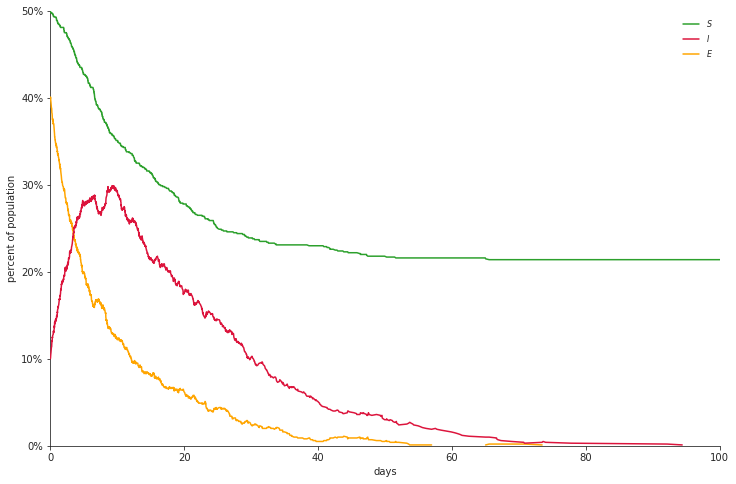

[1000, [[1, 1], [1, 17]], 6, 30]
t = 0.05
t = 10.02
t = 20.01
t = 30.03
t = 40.03
t = 50.07
t = 60.01
t = 70.45
t = 90.36


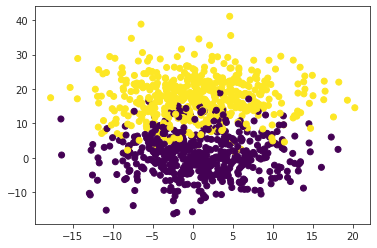

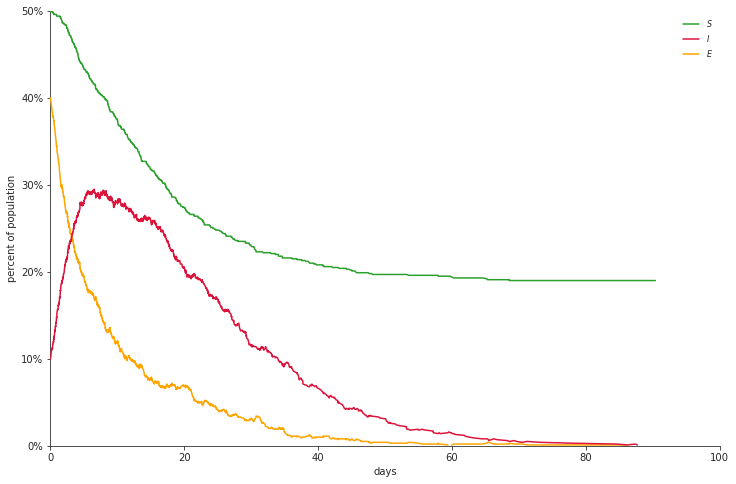

[1000, [[1, 1], [1, 21]], 1, 30]
t = 0.00
t = 10.01
t = 20.00
t = 30.02
t = 40.02
t = 50.03
t = 60.46
t = 70.52
t = 80.22


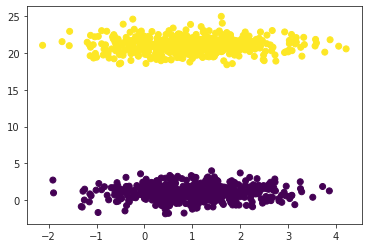

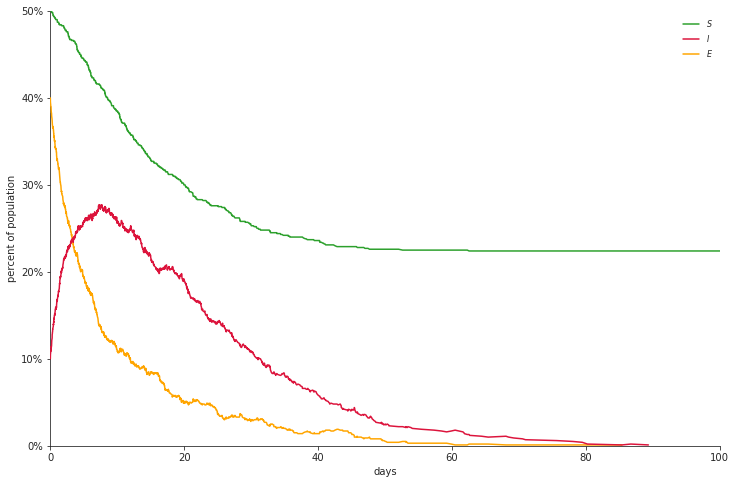

[1000, [[1, 1], [1, 21]], 2, 30]
t = 0.01
t = 10.01
t = 20.01
t = 30.10
t = 40.29
t = 50.28
t = 60.47
t = 80.88
t = 100.34


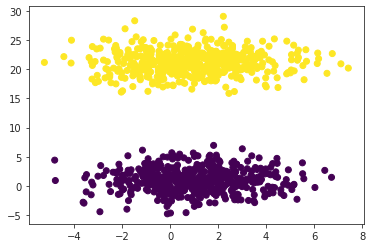

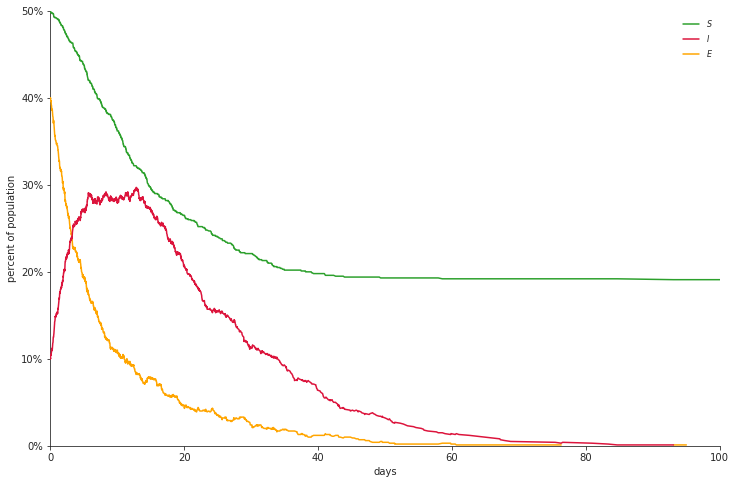

[1000, [[1, 1], [1, 21]], 3, 30]
t = 0.00
t = 10.05
t = 20.02
t = 30.01
t = 40.01
t = 50.16
t = 60.24
t = 70.91


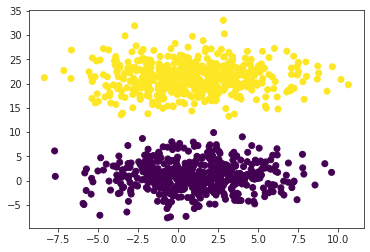

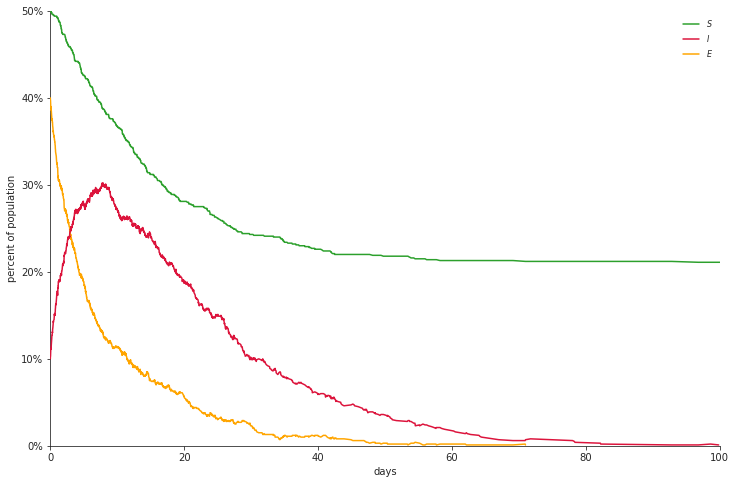

[1000, [[1, 1], [1, 21]], 4, 30]
t = 0.03
t = 10.00
t = 20.02
t = 30.12
t = 40.02
t = 50.29
t = 60.62
t = 70.41


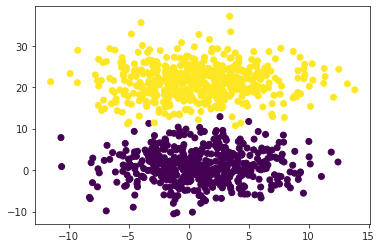

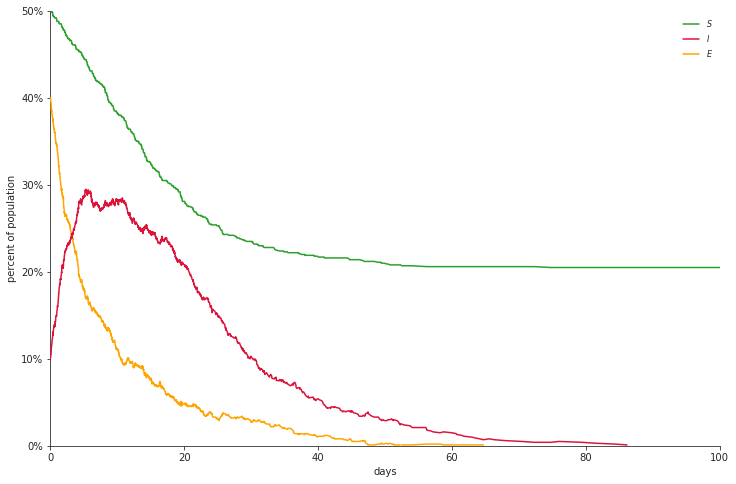

[1000, [[1, 1], [1, 21]], 5, 30]
t = 0.04
t = 10.02
t = 20.02
t = 30.02
t = 40.08
t = 50.20
t = 60.26
t = 70.94


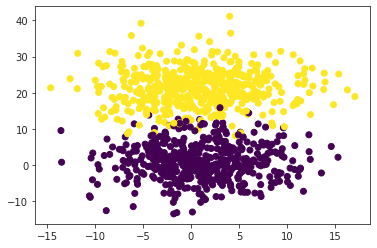

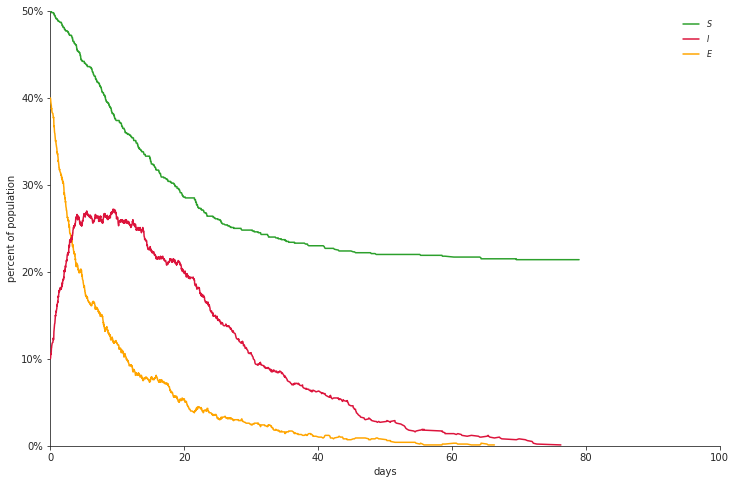

[1000, [[1, 1], [1, 21]], 6, 30]
t = 0.00
t = 10.02
t = 20.01
t = 30.00
t = 40.00
t = 50.23
t = 60.72
t = 70.14
t = 90.71


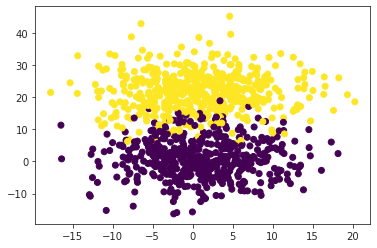

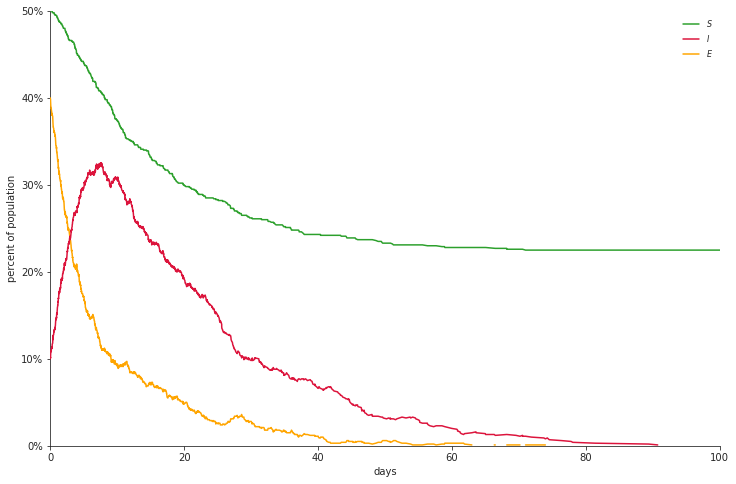

In [8]:
for l in range(5):
    for sdv in range(1, 7):
        ipfn(1000,[[1,1],[1,(4*l+5)]], sdv, 30,l)